<a href="https://colab.research.google.com/github/mkjubran/OGAN-results/blob/main/PlotCurvesOGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

Loading Results

In [109]:
!rm -rf ./OGAN-results
!git clone https://github.com/mkjubran/OGAN-results.git

Cloning into 'OGAN-results'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15 (delta 3), reused 5 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


##MNIST image size 32

In [110]:
df = pd.read_csv('/content/OGAN-results/output-mnist32.csv')
df=df[1:]

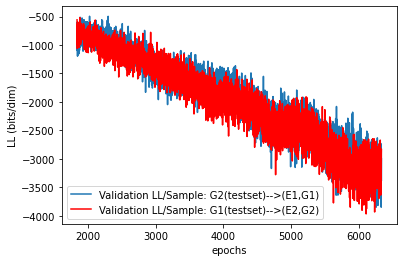

In [111]:
VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]
ax = plt.gca()
df_VLLb['Validation LL/Sample: G2(testset)-->(E1,G1)'].plot(kind='line',ax=ax)
df_VLLb['Validation LL/Sample: G1(testset)-->(E2,G2)'].plot(kind='line', color='red', ax=ax)
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()

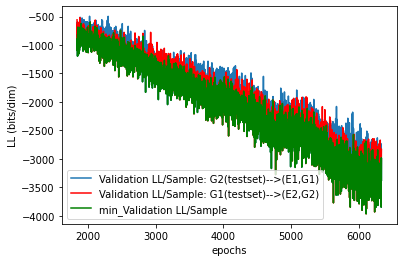

In [112]:
df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

ax = plt.gca()
df_VLLb['Validation LL/Sample: G2(testset)-->(E1,G1)'].plot(kind='line',ax=ax)
df_VLLb['Validation LL/Sample: G1(testset)-->(E2,G2)'].plot(kind='line', color='red', ax=ax)
df_VLLb['min_Validation LL/Sample'].plot(kind='line', color='green', ax=ax)
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()


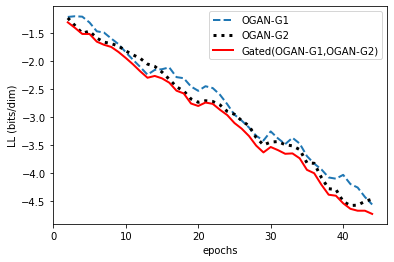

In [113]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(32*32*math.log(2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()



##CIFAR10 image size 32

In [114]:
df = pd.read_csv('/content/OGAN-results/output-cifar32.csv')
df=df[1:]

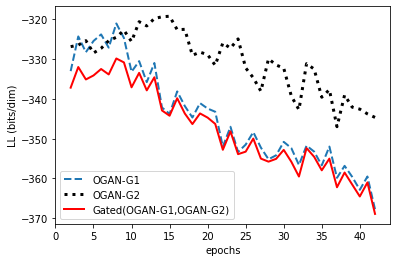

In [115]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(32*32*math.log(2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()



##celeba image size 32

In [116]:
df = pd.read_csv('/content/OGAN-results/output-celeba32.csv')
df=df[1:]

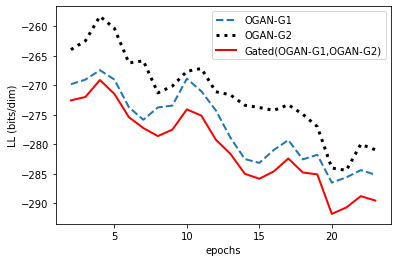

In [117]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(32*32*math.log(2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()



##MNIST image size 64

In [118]:
df = pd.read_csv('/content/OGAN-results/output-mnist64.csv')
df=df[1:]

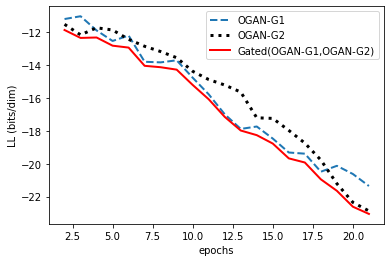

In [119]:
epoch=45
batch=100

VLL = [col for col in df if col.startswith('Validation LL/epoch')]
df_VLLe = df[VLL]
df_VLLe = df_VLLe.dropna()
df_VLLe = df_VLLe.astype('float')


VLL = [col for col in df if col.startswith('Validation LL/Sample')]
df_VLLb = df[VLL]
df_VLLb = df_VLLb.dropna()
df_VLLb = df_VLLb.astype('float')
df_VLLb = df_VLLb[0:epoch*batch]

df_VLLb['min_Validation LL/Sample'] = df_VLLb[['Validation LL/Sample: G2(testset)-->(E1,G1)','Validation LL/Sample: G1(testset)-->(E2,G2)']].min(axis=1)

df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['min_Validation LL/Sample']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G1(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G2(testset)-->(E1,G1)']/(32*32*math.log(2))
df_VLLe['Validation LL/epoch G2(bits/dim)']=df_VLLb.groupby(np.arange(len(df_VLLb))//100).mean()['Validation LL/Sample: G1(testset)-->(E2,G2)']/(32*32*math.log(2))

ax = plt.gca()
df_VLLe['Validation LL/epoch G1(bits/dim)'].plot(kind='line', ax=ax, linestyle='--', linewidth=2, label='OGAN-G1')
df_VLLe['Validation LL/epoch G2(bits/dim)'].plot(kind='line', color='k', ax=ax, linestyle=':', linewidth=3, label='OGAN-G2')
df_VLLe['Validation LL/epoch: min(G1+G2) (bits/dim)'].plot(kind='line', color='r', ax=ax, linewidth=2, label='Gated(OGAN-G1,OGAN-G2)')
plt.xlabel('epochs')
plt.ylabel('LL (bits/dim)')
plt.legend()
plt.show()

